Create a randomly selected sample of galaxies to see where pipeline benefits start to fall short.

In [11]:
from astropy.io import fits
from astropy.table import Table
import os
import numpy as np
from sklearn.utils import resample


In [12]:
path = '/global/homes/m/mkwiecie/desi/sv3-clustering'
file = 'BGS_BRIGHT_S_clustering.dat.fits'

In [13]:
bgs_bs = Table(fits.getdata(os.path.join(path, file)))
print(bgs_bs.colnames)

['RA', 'DEC', 'TARGETID', 'NTILE', 'TILES', 'Z', 'COMP_TILE', 'rosette_number', 'rosette_r', 'FRACZ_TILELOCID', 'BITWEIGHTS', 'PROB_OBS', 'WEIGHT_ZFAIL', 'WEIGHT', 'flux_g_dered', 'flux_r_dered', 'flux_z_dered', 'flux_w1_dered', 'flux_w2_dered', 'REST_GMR_0P1', 'KCORR_R0P1', 'KCORR_G0P1', 'KCORR_R0P0', 'KCORR_G0P0', 'REST_GMR_0P0', 'EQ_ALL_0P0', 'EQ_ALL_0P1', 'ABSMAG_R', 'NZ', 'WEIGHT_FKP']


In [14]:
print(min(bgs_bs['flux_r_dered']))
print(max(bgs_bs['flux_r_dered']))

15.849391
15088.81


In [15]:
def flux_to_mag(flux):
    return (-5/2)*np.log10(flux) + 27

def mag_to_flux(mag):
    return 10**((2/5)* (27 - mag))

In [16]:
mag_max = 24
mag_min = 16.56
bin_edges = 11
mag_bins = np.linspace(mag_min, mag_max, bin_edges)
print(mag_bins)
flux_bins = mag_to_flux(mag_bins)
print(flux_bins)

[16.56  17.304 18.048 18.792 19.536 20.28  21.024 21.768 22.512 23.256
 24.   ]
[14996.84835502  7557.8801368   3808.90376498  1919.55252376
   967.38644997   487.5284901    245.69708276   123.8226231
    62.40221421    31.44850465    15.84893192]


Using
$$
mag = -\frac{5}{2} \log_{10}(f) + 27
$$
and
$$
f = 10^{\frac{2}{5}(27-mag)}
$$

15.849391 = 24
15088.81 = 16.553363

(array([7.5629e+04, 1.7400e+02, 4.2000e+01, 1.5000e+01, 7.0000e+00,
        5.0000e+00, 5.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([   15.849391,  1523.1454  ,  3030.4414  ,  4537.7373  ,
         6045.0337  ,  7552.3296  ,  9059.626   , 10566.922   ,
        12074.218   , 13581.514   , 15088.81    ], dtype=float32),
 [<matplotlib.patches.Polygon at 0x155337066a60>])

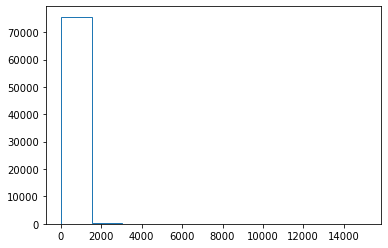

In [17]:
import matplotlib.pyplot as plt

plt.hist(bgs_bs['flux_r_dered'], histtype='step')

In [18]:

def resample_by_bin(min, max, bgs, n_sample):
    
    mask = (bgs['flux_r_dered'] >= min) & (bgs['flux_r_dered'] < max)
    bgs_cut = bgs[mask]
    if n_sample > len(bgs_cut):
        return bgs_cut

    ids = bgs_cut['TARGETID']
    strat = bgs_cut['flux_r_dered']

    subsample_ids = resample(ids, replace=False, n_samples=n_sample, stratify=strat)
    return bgs_cut[np.isin(bgs_cut['TARGETID'], subsample_ids)]


In [23]:
resamples = []

for i in range(len(flux_bins)-1):
    print(flux_bins[i])
    resamples.append(resample_by_bin(flux_bins[i+1], flux_bins[i], bgs_bs, 100))

14996.84835502377
7557.880136804536
3808.9037649813595
1919.552523761383
967.3864499689537
487.528490103386
245.6970827636836
123.82262309589933
62.40221421389766
31.448504654769607


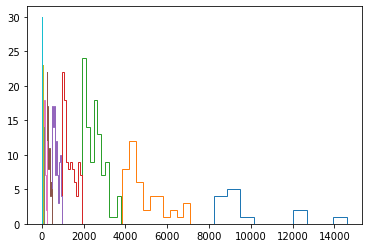

In [24]:
for s in resamples:
    plt.hist(s['flux_r_dered'], histtype='step')

In [25]:
for s in resamples:
    fname = f"subsampled_bgs_min_{min(s['flux_r_dered']):.2f}_max_{max(s['flux_r_dered']):.2f}.fits"
    print(fname)
    s.write('/global/homes/m/mkwiecie/desi/sv3-clustering/subsampled_bgs/'+fname, overwrite=True)

subsampled_bgs_min_8235.47_max_14582.40.fits
subsampled_bgs_min_3860.05_max_7096.44.fits
subsampled_bgs_min_1922.97_max_3773.81.fits
subsampled_bgs_min_968.14_max_1908.68.fits
subsampled_bgs_min_492.14_max_957.75.fits
subsampled_bgs_min_246.13_max_480.84.fits
subsampled_bgs_min_124.30_max_241.02.fits
subsampled_bgs_min_62.70_max_123.38.fits
subsampled_bgs_min_31.50_max_62.21.fits
subsampled_bgs_min_15.85_max_29.39.fits
